<a href="https://colab.research.google.com/github/mietekdom/Nepal_Solar-Radiation-Measurments/blob/main/Nepal_solar_radiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Import data**

In [26]:
df = pd.read_csv('https://energydata.info/dataset/ead8d2fa-de59-48d3-8693-817b36b3a470/resource/ef17f691-0256-497d-a5ee-3c6a334ae1e2/download/solar-measurements_nepal_dharan_wb-esmap_qc.csv',
                 index_col=0, parse_dates=True)
df.head()


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.



ghi  ...                                           comments
time                      ...                                                   
2018-07-01 00:01:00  0.0  ...  Tracking device misaligned; no DNI/DHI measure...
2018-07-01 00:02:00  0.0  ...  Tracking device misaligned; no DNI/DHI measure...
2018-07-01 00:03:00  0.0  ...  Tracking device misaligned; no DNI/DHI measure...
2018-07-01 00:04:00  0.0  ...  Tracking device misaligned; no DNI/DHI measure...
2018-07-01 00:05:00  0.0  ...  Tracking device misaligned; no DNI/DHI measure...

[5 rows x 13 columns]

**Rain analysis**

In [27]:
df_time = df[['rain']]
df_time.head

<bound method NDFrame.head of                      rain
time                     
2018-07-01 00:01:00   0.0
2018-07-01 00:02:00   0.0
2018-07-01 00:03:00   0.0
2018-07-01 00:04:00   0.0
2018-07-01 00:05:00   0.0
...                   ...
2020-04-30 23:56:00   0.0
2020-04-30 23:57:00   0.0
2020-04-30 23:58:00   0.0
2020-04-30 23:59:00   0.0
2020-05-01 00:00:00   0.0

[964800 rows x 1 columns]>

In [28]:
rain_2018 = df_time.loc['2018']
rain_2019 = df_time.loc['2019']
rain_2020 = df_time.loc['2020']
rain_2018

rain
time                     
2018-07-01 00:01:00   0.0
2018-07-01 00:02:00   0.0
2018-07-01 00:03:00   0.0
2018-07-01 00:04:00   0.0
2018-07-01 00:05:00   0.0
...                   ...
2018-12-31 23:55:00   0.0
2018-12-31 23:56:00   0.0
2018-12-31 23:57:00   0.0
2018-12-31 23:58:00   0.0
2018-12-31 23:59:00   0.0

[264959 rows x 1 columns]

In [29]:
rain_2018_day = rain_2018.resample('D').mean().head()
rain_2019_day = rain_2019.resample('D').mean().head()
rain_2020_day = rain_2020.resample('D').mean().head()
rain_2020_day.head()

rain
time                
2020-01-01  0.000000
2020-01-02  0.000000
2020-01-03  0.006875
2020-01-04  0.000486
2020-01-05  0.000000

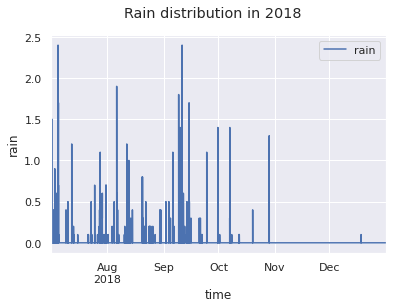

In [30]:
_ = rain_2018.plot()
_ = plt.suptitle('Rain distribution in 2018')
_ = plt.xlabel('time')
_ = plt.ylabel('rain')

In [34]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']
fig = go.Figure()
fig.add_trace(go.Scatter(x=month, y=rain_2018['rain'], name='2018',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=month, y=rain_2019['rain'], name='2019',
                         line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=month, y=rain_2020['rain'], name='2020',
                         line=dict(color='green', width=4)))

fig.show()